In [1]:
from plyfile import PlyData, PlyElement
import numpy as np
import colorsys
import matplotlib.pyplot as plt
%matplotlib inline

# Download here: https://sketchfab.com/3d-models/notre-dame-paris-facade-hi-res-point-cloud-50deeb164f324d1c8607bafa67f948b9
# plydata = PlyData.read('ND_total.ply')

# Download here: https://sketchfab.com/3d-models/notre-dame-spire-reconstruction-2-newpalmyra-bcfc98fad3f24c4f959087c379af2666
plydata = PlyData.read('notredame_plus_spire.ply')

In [2]:
array = []
colors = list()
for x in range(0, len(plydata.elements[0].data), 20):
    a,c,d,r,g,b, _, _, _ = plydata.elements[0].data[x]
    
    # Rescale the colors to hue... This currently makes everything quite ugly,
    # Send me a request if you really need RGB in your pointcloud
    r/=255.0
    g/=255.0
    b/=255.0
    h, _, _ = colorsys.rgb_to_hsv(r,g,b)
    r,g,b = colorsys.hsv_to_rgb(h,1.0,1.0)
    colors.append([r,g,b])
    array.append([a,c,d,h])

In [4]:
npar = np.array(array, dtype=np.float32)
npar = npar[:,:4]
npar.shape
npar = npar[:,[0,2,1,3]]
npar.byteswap().tofile('nd_large.npy')

float32


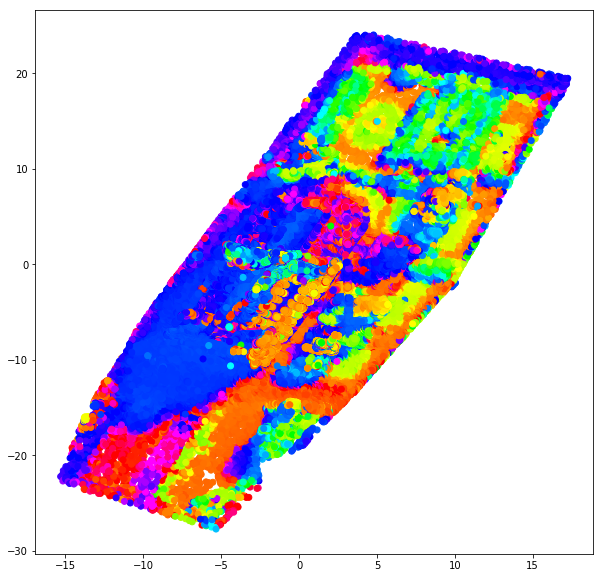

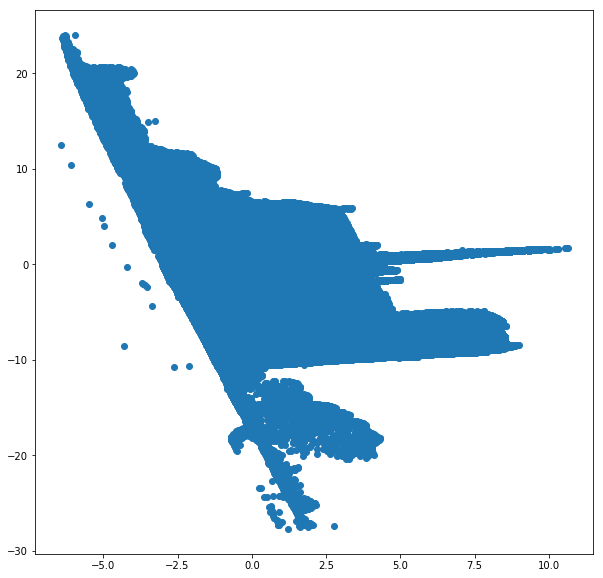

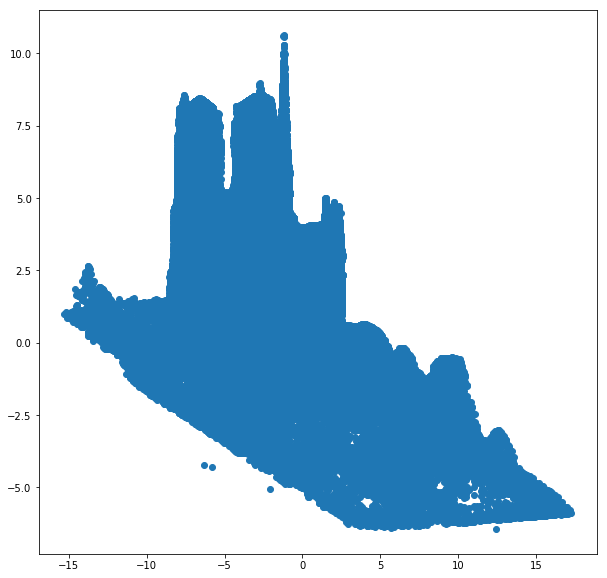

In [7]:
# Visualise the output so you can see the pointcloud is indeed what we saved...
plt.figure(figsize=(10,10))
plt.scatter(npar[:,0], npar[:,2], c=np.array(colors))
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(npar[:,1], npar[:,2])
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(npar[:,0], npar[:,1])
plt.show()